In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [42]:
train_data = train_data.drop('Id', axis=1)

In [43]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [45]:
print(train_data.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

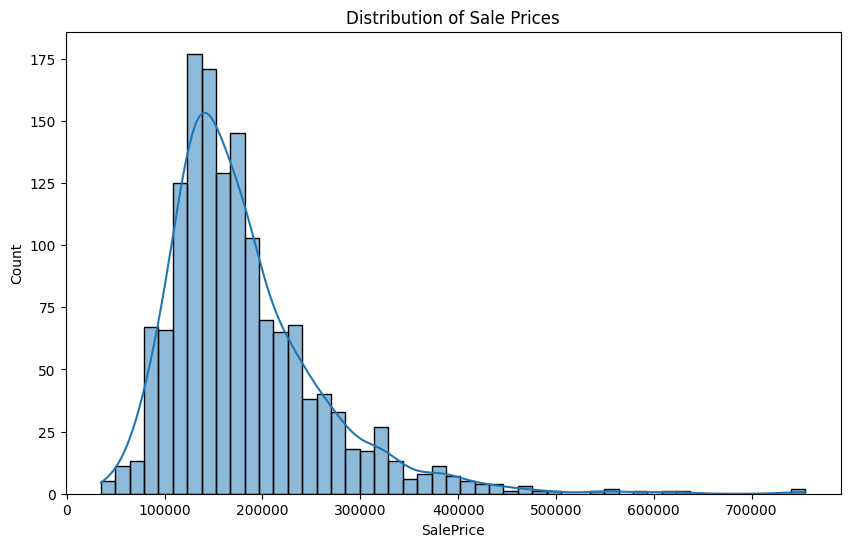

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

In [47]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

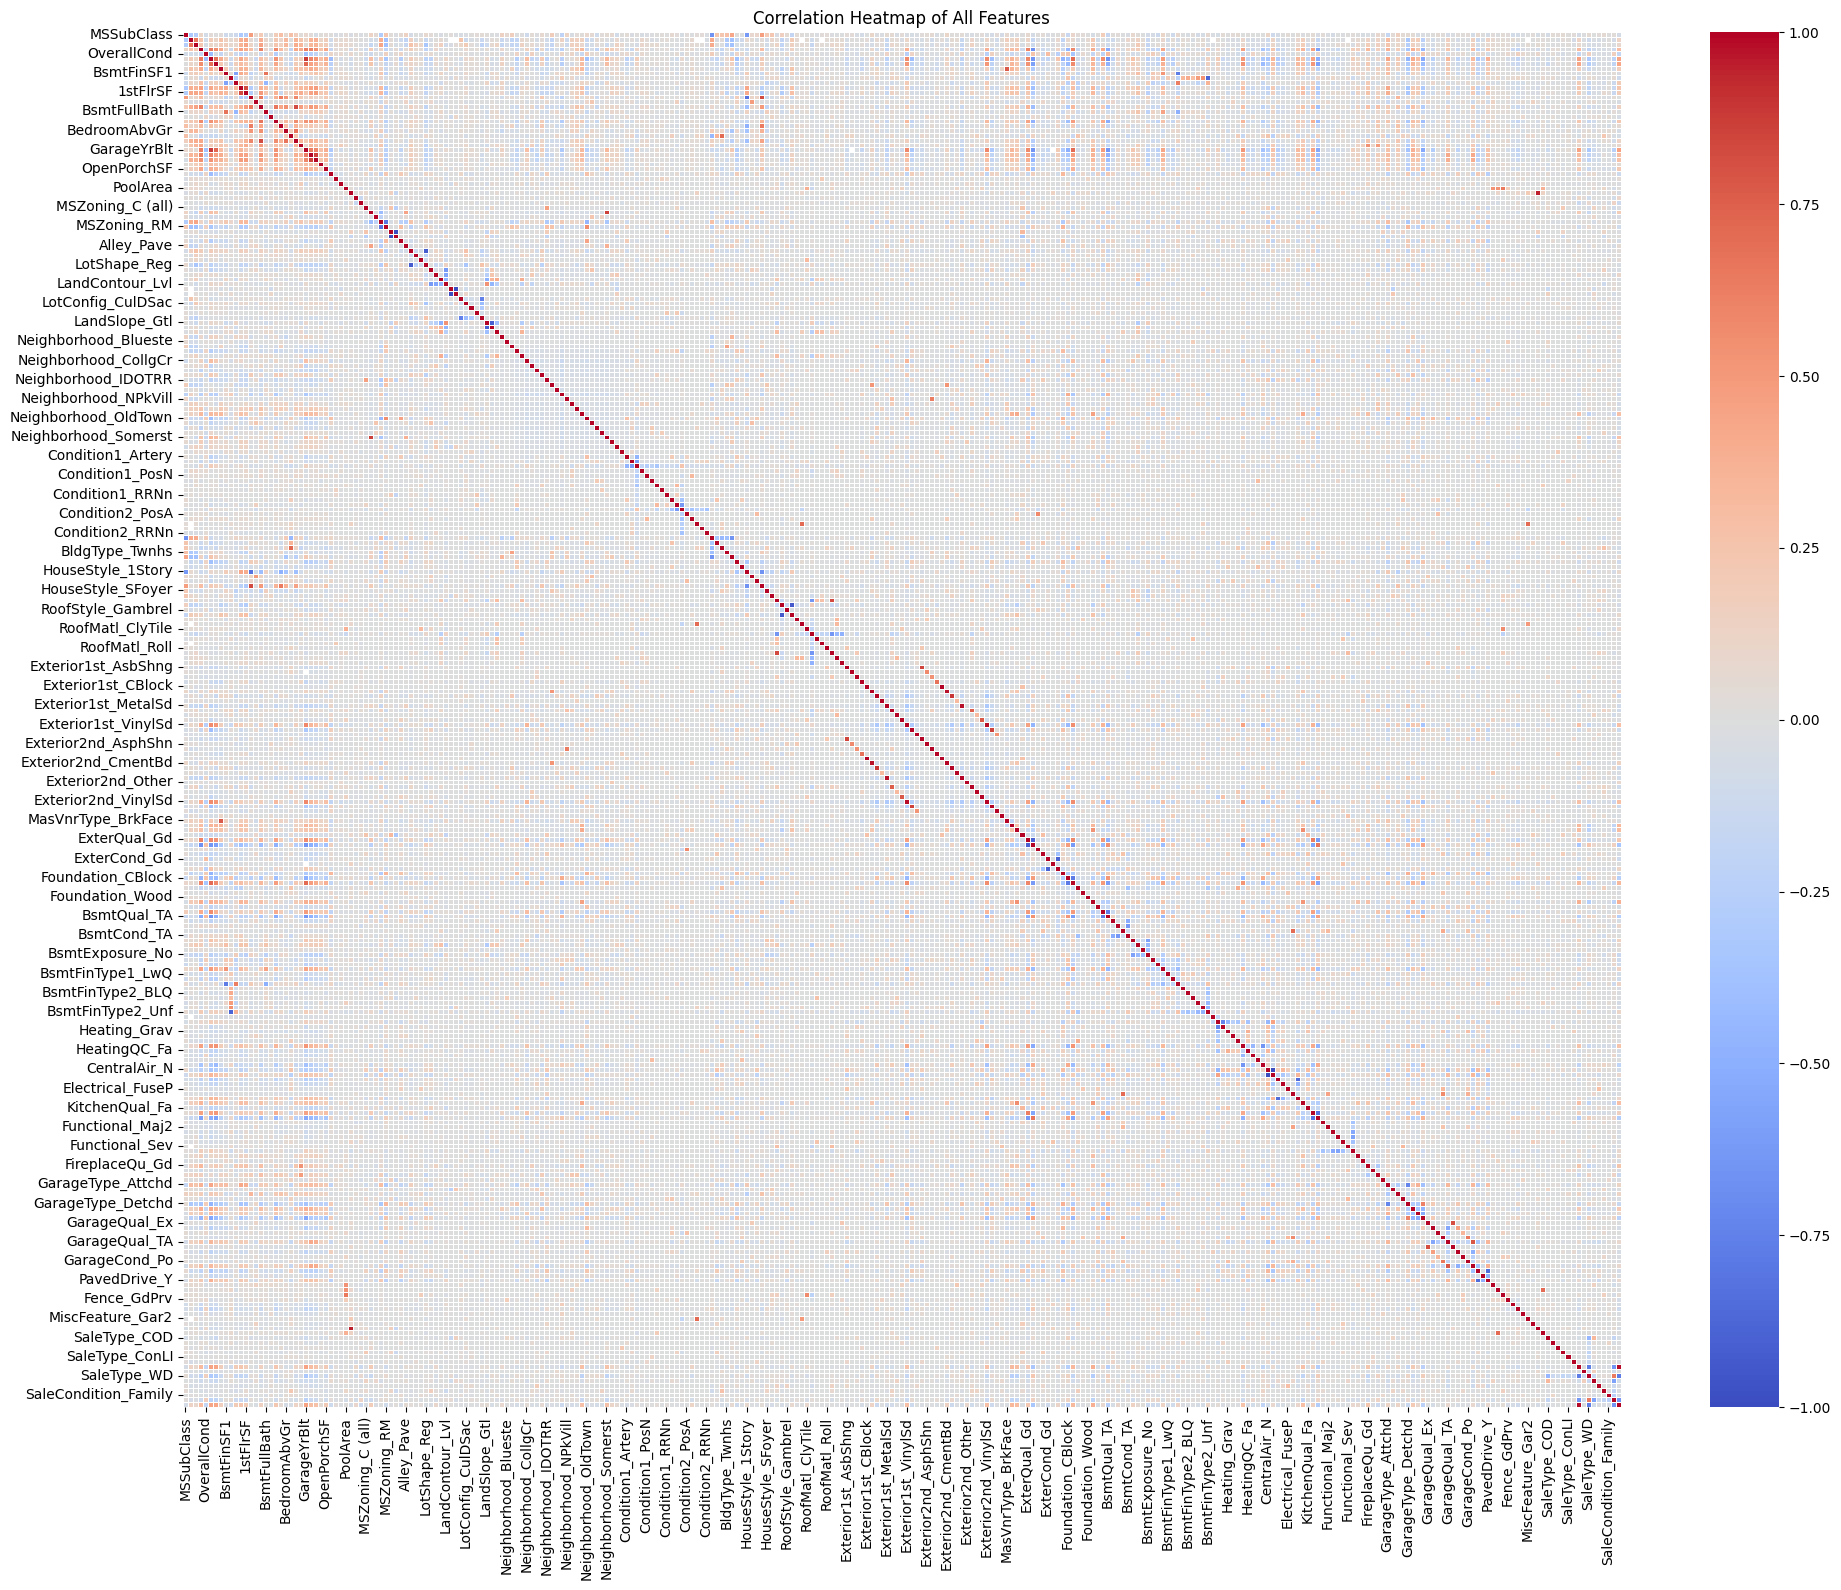

In [48]:
df_encoded = pd.get_dummies(X, columns=categorical_columns)

correlation_matrix = df_encoded.corr(method='spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

In [49]:
correlations_with_target = df_encoded.corrwith(y).abs().sort_values(ascending=False)

In [50]:
print(correlations_with_target.head(20))

OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtQual_TA         0.452394
dtype: float64


In [51]:
top_features = correlations_with_target[abs(correlations_with_target) > 0.5].index.tolist()
top_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'BsmtQual_Ex',
 'TotRmsAbvGrd',
 'YearBuilt',
 'KitchenQual_TA',
 'YearRemodAdd',
 'KitchenQual_Ex']

In [52]:
selected_numerical = [col for col in top_features if col in numerical_columns]
selected_categorical = [col for col in categorical_columns if col in top_features or any(col + '_' in feature for feature in top_features)]

In [53]:
print("\nSelected numerical features:", selected_numerical)
print("Selected categorical features:", selected_categorical)


Selected numerical features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
Selected categorical features: ['ExterQual', 'BsmtQual', 'KitchenQual']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_numerical + selected_categorical], y, test_size=0.2, random_state=42)

In [55]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [56]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selected_numerical),
        ('cat', categorical_transformer, selected_categorical)
    ])

In [58]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [59]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [60]:
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Performance:
Mean Squared Error: 842008544.1283267
R2 Score: 0.890225197549048


In [63]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(n_estimators=100, 
                                                                learning_rate=0.1, 
                                                                max_depth=3, 
                                                                random_state=42))])

In [64]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [65]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Performance:
Mean Squared Error: 898166953.8035591
R2 Score: 0.8829036823802914


In [67]:
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = (model.named_steps['preprocessor']
                 .named_transformers_['num'].get_feature_names_out().tolist() +
                 model.named_steps['preprocessor']
                 .named_transformers_['cat'].get_feature_names_out().tolist())

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))


Top 10 Important Features:
         feature  importance
0    OverallQual    0.527281
1      GrLivArea    0.184183
4    TotalBsmtSF    0.080355
2     GarageCars    0.037441
5       1stFlrSF    0.034208
9   YearRemodAdd    0.029354
14   BsmtQual_Ex    0.022757
8      YearBuilt    0.021198
6       FullBath    0.016362
3     GarageArea    0.014528


In [68]:
test_X = test_data.drop('Id', axis=1)


In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selected_numerical),
        ('cat', categorical_transformer, selected_categorical)
    ])

In [70]:
test_predictions = model.predict(test_X)

In [71]:
submission_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

In [72]:
submission_df.to_csv('submission.csv', index=False)